In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Reading and Understanding the data


In [3]:
bike_df=pd.read_csv("day.csv")

In [4]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
#converting dteday to DateTime format
bike_df.dteday=pd.to_datetime(bike_df.dteday)

In [9]:
#First we need to convert some variable into category datatype

bike_df.season=bike_df.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
bike_df.weathersit=bike_df.weathersit.map({1:"weather_1",2:"weather_2",3:"weather_3",4:"weather_4"})
bike_df.weekday = bike_df.weekday.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bike_df.mnth = bike_df.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

In [10]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,Mon,1,weather_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,jan,0,Tue,1,weather_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,jan,0,Wed,1,weather_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,jan,0,Thu,1,weather_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,jan,0,Fri,1,weather_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike_df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Check Missing and Null value

In [12]:
round(100*(bike_df.isnull().sum()/len(bike_df.index)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

`There is no missing value and Null value`

## Visualizing the data


In [13]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [14]:
bike_new_df=bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [15]:
bike_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [16]:
bike_numerical=bike_new_df[['temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

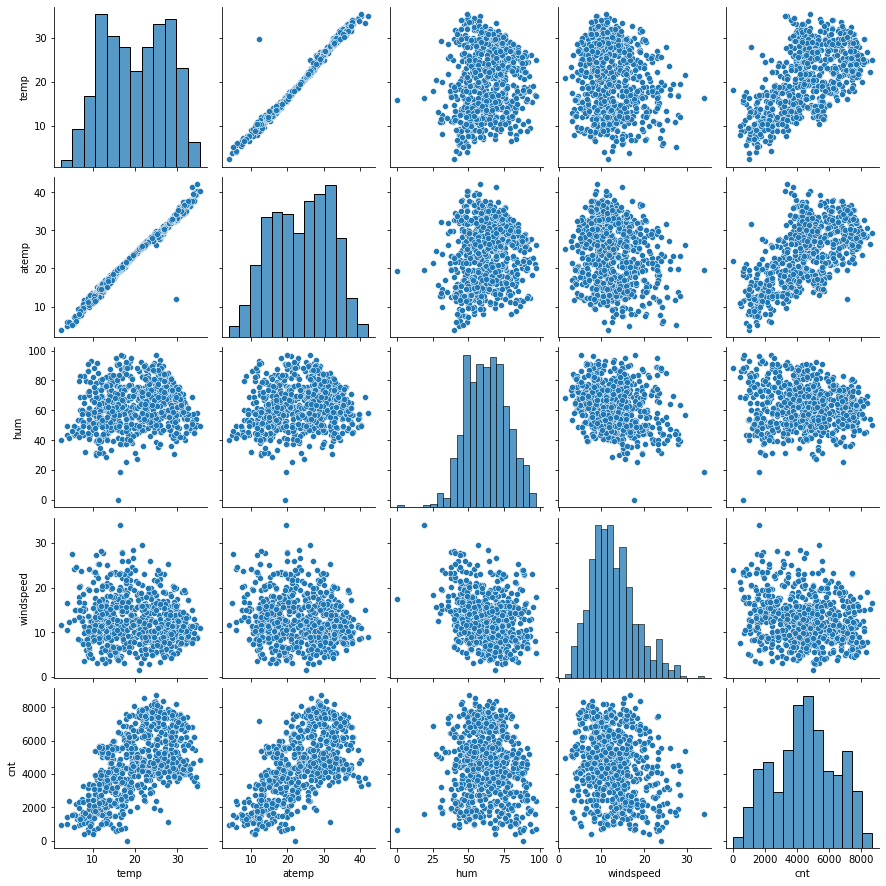

In [17]:
sns.pairplot(bike_numerical)
plt.show()

<font color= black> <font size =3> we can clearly saw that there is a Linear Relationship between temp,atemp and cnt </font></font>

## Visualising categorical Variable
 
 First we need to convert some variable into category datatype

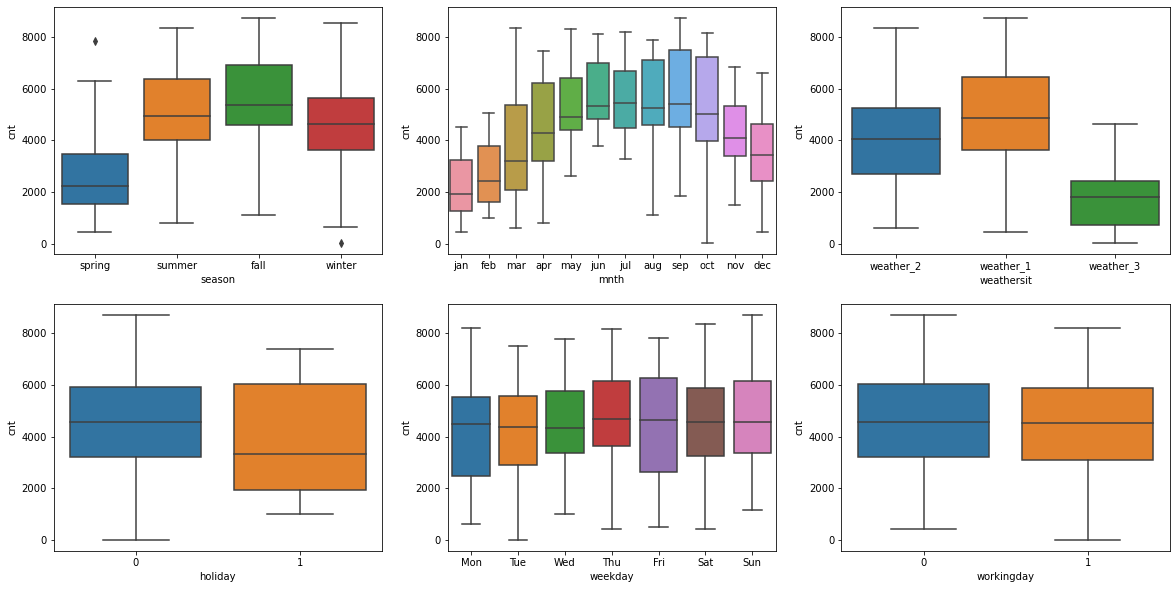

In [18]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new_df)
plt.show()


The Inference that I could derived were:
1.	Most of the bike were book in season Fall whereas least booking in season spring.
2.	Maximum Bike booking were done in the month of May, Jun, July, Aug and sept  
and least booking is done in month Jan.
3.	Most of the booking were done on weather_1 which is Clear, Few clouds, Partly cloudy, Partly cloudy and least booking in weather_3 which is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
4.	Almost 97.6% Bike booking were happening  when it is not a holiday which means this data is clearly biased.
5.	Weekday shows very close trend from Thurs to Sun.
6.	No noticeable change in bike demand with working days and non-working days .


## Dummy Variables

In [19]:
season=pd.get_dummies(bike_new_df['season'],drop_first=True)
weather=pd.get_dummies(bike_new_df['weathersit'],drop_first=True)
weekday=pd.get_dummies(bike_new_df['weekday'],drop_first=True)
mnth=pd.get_dummies(bike_new_df['mnth'],drop_first=True)


In [20]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
df=[bike_new_df,season,weather,weekday,mnth]

In [22]:
bike_new_df=pd.concat(df,axis=1)

In [23]:
bike_new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,Mon,1,weather_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,Tue,1,weather_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,Wed,1,weather_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,Thu,1,weather_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,Fri,1,weather_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
bike_new_df=bike_new_df.drop(columns=["season","mnth","weekday","weathersit"])

In [25]:
bike_new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
bike_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  weather_2   730 non-null    uint8  
 12  weather_3   730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  aug         730 non-null    u


## Spliting the data into Training and Testing Set

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_train.shape

(510, 30)

In [30]:
df_test.shape

(219, 30)

## Rescalling the Features

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking the correlation coefficients to see which variables are highly correlated

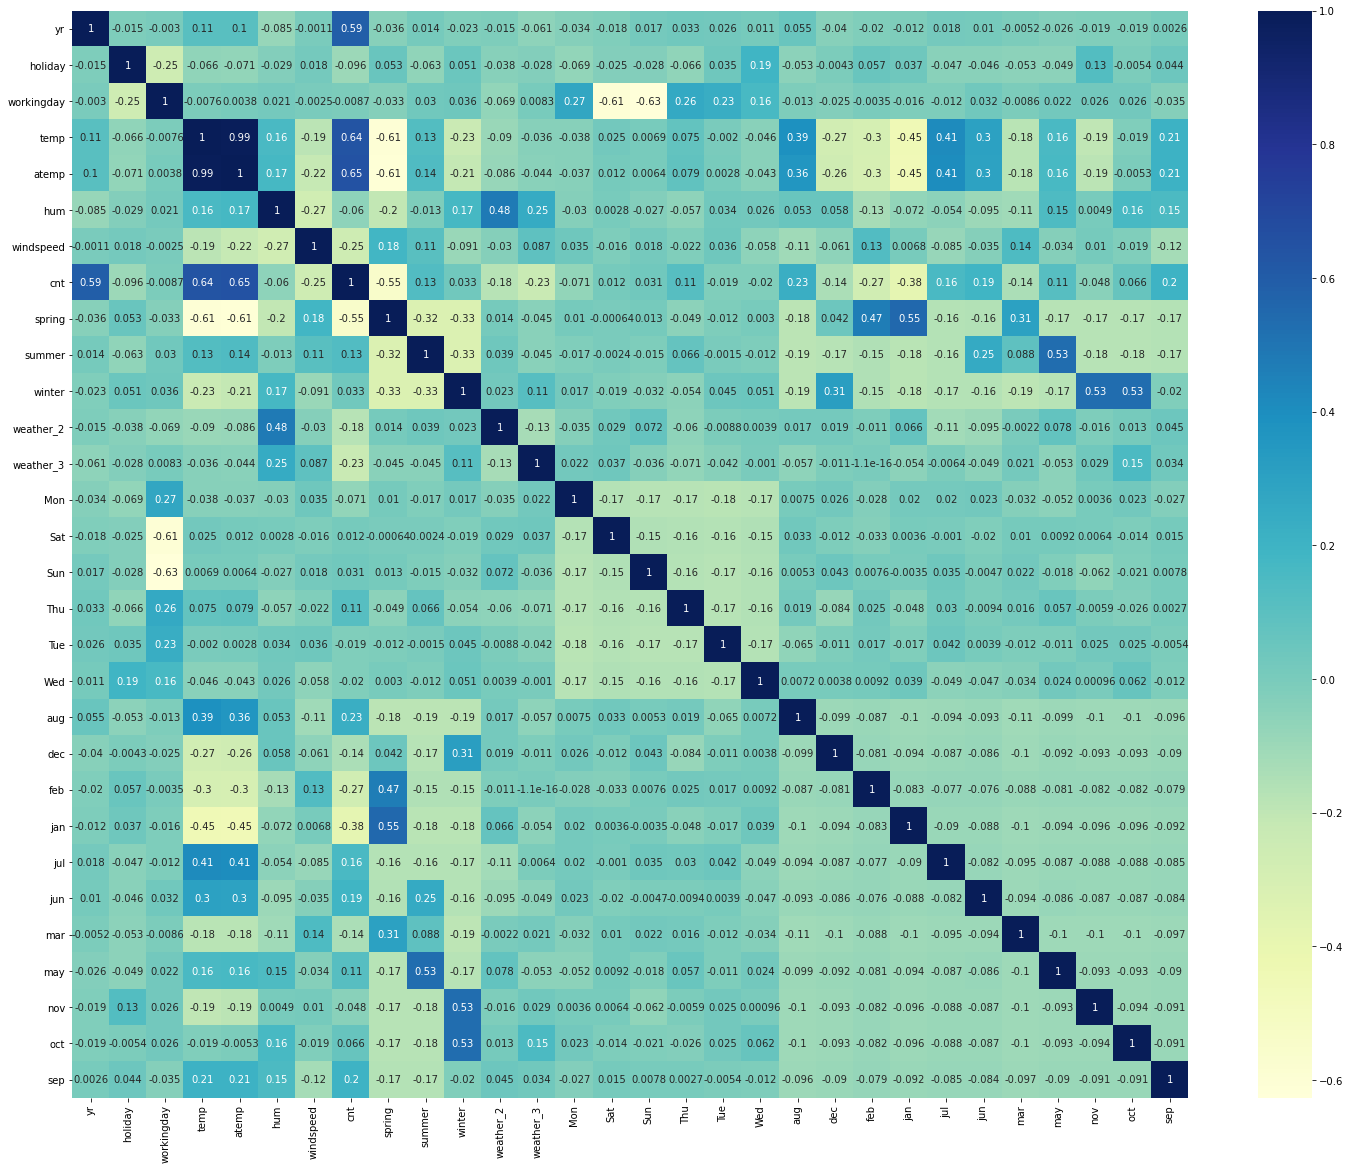

In [37]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we can notice that target variable cnt is corelated with temp and atemp lets see a pairplot

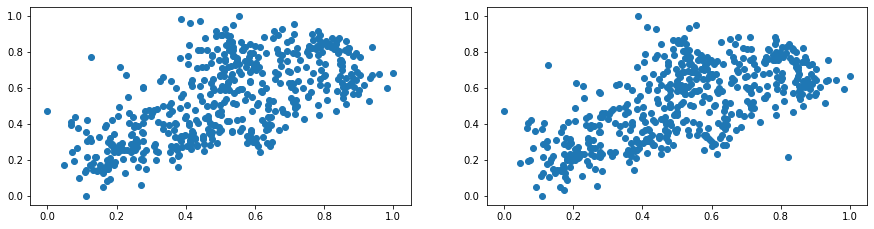

In [38]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.scatter(df_train.cnt, df_train.temp)
plt.subplot(2,2,2)
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

## Building a linear model
### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
X_train.shape

(510, 29)

## RFE


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [43]:
rfe = RFE(lm,14)            
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('Mon', False, 10),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('aug', False, 11),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 15),
 ('mar', False, 16),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'weather_2', 'weather_3', 'jan', 'jul', 'nov', 'sep'], dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'oct'], dtype='object')

In [47]:
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL

### Model 1



In [48]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm1 = sm.OLS(y_train, X_train_lm1).fit()

lm1.params

const        0.303050
yr           0.230120
holiday     -0.092199
temp         0.505231
hum         -0.168201
windspeed   -0.185388
spring      -0.056383
summer       0.046634
winter       0.098613
weather_2   -0.054304
weather_3   -0.241759
jan         -0.033925
jul         -0.056220
nov         -0.025288
sep          0.079785
dtype: float64

In [49]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.25e-189
Time:                        18:55:29   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.0

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,spring,4.37
7,winter,3.78
6,summer,2.79
8,weather_2,2.29
0,yr,2.09
10,jan,1.67
11,jul,1.59









We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model
-  R-squared value:0.844 and Adj. R-squared:0.840
-  As we can see from the summary and the VIF dataframe, some variables are insignificant. One of these variables is `nov`, it has a very high p-value of 0.144. so we will first drop this variable.

### Model 2

In [51]:
X_train_new = X_train_rfe.drop(["nov"], axis = 1)

In [52]:


# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const        0.295720
yr           0.230076
holiday     -0.096813
temp         0.512685
hum         -0.166542
windspeed   -0.187088
spring      -0.051791
summer       0.049088
winter       0.093078
weather_2   -0.054123
weather_3   -0.240539
jan         -0.033102
jul         -0.055924
sep          0.082481
dtype: float64

In [53]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.45e-190
Time:                        18:55:29   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.0

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.05
2,temp,16.70
4,windspeed,4.66
5,spring,4.34
7,winter,3.38
6,summer,2.78
8,weather_2,2.28
0,yr,2.09
10,jan,1.67
11,jul,1.59


### Dropping the variable and updating the model
-  After dropping `nov` variable negligible changed in R-squared:0.843 and Adj. R-squared:0.839
-  As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jan` as it high p-value of `0.061`.so we will drop this variable and check the difference in R-squared and Adj. R-squared.

## Model 3

In [55]:
X_train_new = X_train_new.drop(["jan"], axis = 1)

In [56]:
X_train_lm3= sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:

lr3.params

const        0.284133
yr           0.229346
holiday     -0.097404
temp         0.530017
hum         -0.171023
windspeed   -0.181924
spring      -0.056249
summer       0.051942
winter       0.098745
weather_2   -0.054175
weather_3   -0.238245
jul         -0.057536
sep          0.083036
dtype: float64

In [58]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.69e-190
Time:                        18:55:29   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.06
2,temp,16.02
4,windspeed,4.65
5,spring,4.01
7,winter,3.35
6,summer,2.78
8,weather_2,2.28
0,yr,2.08
10,jul,1.58
11,sep,1.38


### Dropping the variable and updating the model
-   After dropping `jan` variable negligible changed in R-squared:0.842 and Adj. R-squared:0.838
-  As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has very high VIF `28.06`.so we will drop this variable and check the difference in R-squared and Adj. R-squared.

## Model 4

In [60]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [61]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [62]:
lr4.params

const        0.199648
yr           0.233482
holiday     -0.098013
temp         0.491508
windspeed   -0.147977
spring      -0.066942
summer       0.045280
winter       0.083084
weather_2   -0.081558
weather_3   -0.285155
jul         -0.052418
sep          0.076686
dtype: float64

In [63]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.40e-187
Time:                        18:55:29   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,jul,1.58
7,weather_2,1.55
10,sep,1.34
8,weather_3,1.08


### Dropping the variable and updating the model
-   After dropping `hum` variable slightly changed in R-squared:0.836 and Adj. R-squared:0.832
-  As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jul` as it has not that much p-value `0.005`Even though the VIF of temp is not in permissible range  we decided to drop `jul` and not `temp` based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.so we will drop jul variable and check the difference in R-squared and Adj. R-squared.

## Model 5

In [65]:
X_train_new = X_train_new.drop(["jul"], axis = 1)

In [66]:
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [67]:
lr5.params

const        0.190994
yr           0.234060
holiday     -0.096865
temp         0.478177
windspeed   -0.148155
spring      -0.055092
summer       0.060987
winter       0.095929
weather_2   -0.080124
weather_3   -0.286002
sep          0.090932
dtype: float64

In [68]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.36e-187
Time:                        18:55:30   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.89
6,winter,1.63
7,weather_2,1.54
9,sep,1.23
8,weather_3,1.08
1,holiday,1.04



-  After dropping `jul` variable slightly changed in R-squared:0.833 and Adj. R-squared:0.830

-  This model looks good p-value for all the predictors seem to be significant,From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5, now we can consider this is our final model.

## Final Model observation

#### lr5 model coefficient values


-  const                    0.1910      
-  yr                       0.2341      
-  holiday                 -0.0969      
-  temp                     0.4782      
-  windspeed               -0.1482      
-  spring                  -0.0551     
-  summer                   0.0610      
-  winter                   0.0959      
-  weather_2               -0.0801      
-  weather_3               -0.2860 
-  sep                     0.0909

### F-Statistics

-  F-statistic : 249.2
-  Prob (F-statistic) : 7.36e-187

The F-Statistics value is  249.2 , the p-value is '~0.0000' and all the predictor have VIF less than 5 states that the overall model is significant

#### The equation of best fitted line based on model lr5:

$ cnt=0.1910 + (yr*0.2341) - (holiday*0.0969) + (temp*0.4782) -(windspeed*0.1482) -(spring*0.0551) + (summer*0.0551) +(winter*0.0959) - (weather_2*0.0801) - (weather_3*0.2860)+(sep*0.0909) $

## Residual Analysis of the train data

In [70]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

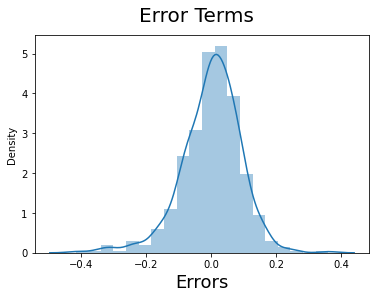

In [71]:
fig = plt.figure()
resultant=y_train - y_train_pred
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)     

Errors terms are normally distributed with mean zero, Hence our assumption for Linear Regression is valid

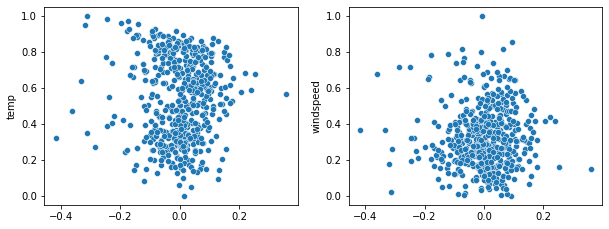

In [72]:
plt.figure(figsize=[10,8])
plt.subplot(221)
sns.scatterplot(resultant,X_train.temp)
plt.subplot(222)
sns.scatterplot(resultant,X_train.windspeed)
plt.show()

## Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [73]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed',
       'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [74]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [75]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weather_2,weather_3,Mon,Sat,Sun,Thu,Tue,Wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.319635,0.027397,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.467403,0.163612,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
X_test=X_test[col]

In [78]:
# dropping the variables we dropped in the train data

X_test=X_test.drop(columns=["nov","jan","hum","jul"])

In [79]:
# adding const
X_test_sm=sm.add_constant(X_test)

In [80]:
y_test_pred = lr5.predict(X_test_sm)

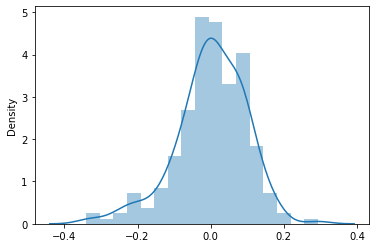

In [81]:
resultant_test=y_test-y_test_pred
sns.distplot(resultant_test)
plt.show()

Errors terms are normally distributed with mean zero

## Model Evaluation

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8035441330582012

In [83]:
r2=0.8035441330582012

In [84]:
X_test.shape

(219, 10)

In [85]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7940991394552301

<function matplotlib.pyplot.show(close=None, block=None)>

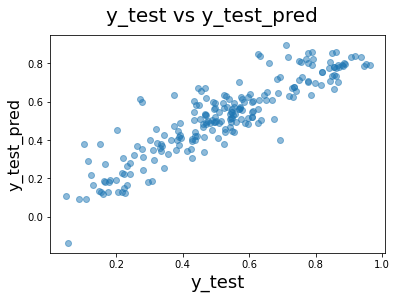

In [86]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)      
plt.show

The equation of best fitted line based on model lr5:

$ cnt=0.1910 + (yr*0.2341) - (holiday*0.0969) + (temp*0.4782) -(windspeed*0.1482) -(spring*0.0551) + (summer*0.0551) +(winter*0.0959) - (weather_2*0.0801) - (weather_3*0.2860)+(sep*0.0909) $

Final result comparision  Train-R^2:0.833 and Train_Adj. R^2:0.830 while Test_R^2:0.803 and Test_Adj.R^2:0.794, This seems to be a good model.

 As per our final Model, the top 3 predictor variables that influences the bike booking are: --- - Temperature (temp) - A coefficient value of ‘0.4782’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4782 units. weather_3 - A coefficient value of ‘-0.2860’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2860 units. Year - A coefficient value of ‘0.2341’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2341 units.SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING. Mnth(september)-A coefficient value '0.0909' indicated that a unit increase in sept variables increase the bike hire numbers by '0.0909' units. season(winter)- A coefficient value '0.0959' indicated that a unit increase in winter variables increase the bike hire numbers by '0.0959' units.